In [1]:
import sys
sys.path.append('../')
import pystan
import stan_utility

import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

Zad 1

* Gamma prior distribution

In [46]:
with open('my_model_prior.stan', 'r') as file:
    print(file.read())

data {
	vector[2] params; 
}

generated quantities {
  real y = gamma_rng (params[1], params[2]);
}


In [47]:
from pystan import StanModel
tuning2 = StanModel('my_model_prior.stan')

params = [1, 2]
data=dict(params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_656bbc4d88987fb6fc8bd7adc5eb5943 NOW.


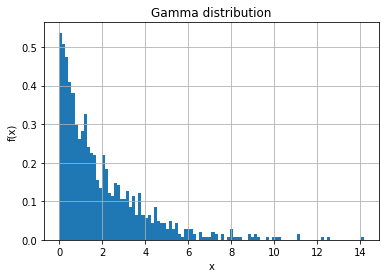

In [49]:
samples = np.random.gamma(params[0], params[1], 1000)
count, bins, ignored = plt.hist(samples, 100, density=True, cumulative=False)
plt.title('Gamma distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

* Gamma likelihood distribution

In [43]:
with open('my_model.stan', 'r') as file:
    print(file.read())

functions {

  vector tail_delta(vector y, vector params, real[] x_r, int[] x_i) {
    vector[3] deltas;
    deltas[1] = gamma_cdf(params[1], exp(y[1]), exp(y[2])) - exp(y[3]);
	deltas[2] = gamma_cdf(params[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
    deltas[3] = exp(y[1])/exp(y[2]) - 7;
    return deltas;
  }
}

data {
  vector[3] y_guess;
  vector[2] params; 
}

transformed data {

  vector[3] y;
  real x_r[0];
  int x_i[0];

  y = algebra_solver(tail_delta, y_guess, params, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


In [39]:
params = np.array([5, 10])
y_guess = np.array([np.log(8), np.log(1), np.log(0.09)])
print(params)

[ 5 10]


In [40]:
from pystan import StanModel
tuning2 = StanModel('my_model.stan')

data=dict(y_guess = y_guess, params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3d63282d111f9c2774b6038d62b25d92 NOW.


In [41]:
alpha = np.round(tuned2.extract()['alpha'][0])
print(alpha)
beta = np.round(tuned2.extract()['beta'][0])
print(beta)

47.0
7.0


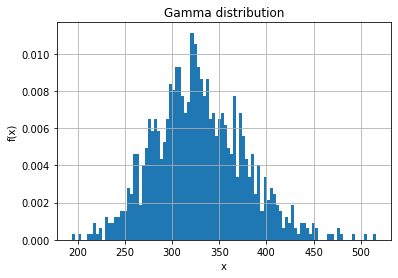

In [42]:
samples = np.random.gamma(alpha, beta, 1000)
count, bins, ignored = plt.hist(samples, 100, density=True, cumulative=False)
plt.title('Gamma distribution')
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()

* invGamma prior distribution

In [68]:
with open('inv-gamma-prior.stan', 'r') as file:
    print(file.read())

data {
	vector[2] params; 
}

generated quantities {
  real y = inv_gamma_rng (params[1], params[2]);
}


In [69]:
from pystan import StanModel
tuning2 = StanModel('inv-gamma-prior.stan')

params = [1, 2]
data=dict(params = params)
tuned2 = tuning2.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_505ce17ab424a3cfab8dabcdda6344c4 NOW.


* Inv_gamma likelihood distribution

In [63]:
with open('inv-gamma.stan', 'r') as file:
    print(file.read())

functions {

  vector tail_delta(vector y, vector params, real[] x_r, int[] x_i) {
    vector[3] deltas;
	deltas[1] = inv_gamma_cdf(params[1], exp(y[1]), exp(y[2])) - exp(y[3]);
    deltas[2] = inv_gamma_cdf(params[2], exp(y[1]), exp(y[2])) - exp(y[3]) - 0.98;
    deltas[3] = exp(y[1])/exp(y[2]) - 7;
    return deltas;
  }
}

data {
  vector[3] y_guess;
  vector[2] params; 
}

transformed data {

  vector[3] y;
  real x_r[0];
  int x_i[0];

  y = algebra_solver(tail_delta, y_guess, params, x_r, x_i);
}

generated quantities {
    real alpha = exp(y[1]);
    real beta = exp(y[2]);
}


In [64]:
params = np.array([5, 10])
y_guess = np.array([np.log(8), np.log(1), np.log(0.09)])
print(params)

[ 5 10]


In [65]:
from pystan import StanModel
model = StanModel('inv-gamma.stan')

data=dict(y_guess = y_guess, params = params)
model = model.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_20e1011456ffc659a451b9b49139a692 NOW.


ValueError: Exception: Exception: inv_gamma_cdf: Shape parameter is nan, but must be > 0!  (in 'inv-gamma.stan' at line 5)
  (in 'inv-gamma.stan' at line 23)


In [55]:
alpha = np.round(model.extract()['alpha'][0])
print(alpha)
beta = np.round(model.extract()['beta'][0])
print(beta)

47.0
7.0


Zad 2

In [330]:
with open('zad2.stan', 'r') as file:
    print(file.read())


data {
  real mu; 
  real phi;
}

generated quantities {
  real y_neg_binomial = neg_binomial_2_cdf(1, mu, phi);
  int y_poisson = poisson_rng(y_neg_binomial);
}


In [337]:
mu_ = 9
phi_ = 0.1

model = StanModel('zad2.stan')

data=dict(mu = mu_, phi = phi_)
model = model.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_9d61f8ce2a7baf8b9b5f17200c8e5402 NOW.


In [339]:
print(model.extract()['y_neg_binomial'][0])
print(model.extract()['y_poisson'][0])

0.8391649970110233
2.0


Zad 3

In [388]:
with open('student_t.stan', 'r') as file:
    print(file.read())

data {
  vector[3] params; 
}

parameters {
  real X;
}

model {

X ~ student_t(params[1], params[2], params[3]);

}


In [ ]:
params = [1, 2, 5]

model = StanModel('student_t.stan')
data=dict(params = params)
model = model.sampling(data=data,
                          seed=1052020,
                          algorithm="Fixed_param",
                          iter=1000, 
                          warmup=0,
                          chains=1)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_b618f43a0e8907c9590ec61cdaeff384 NOW.
